# AE Reinforcement learning - Homework 3

## Acrobot

This classical control problem is heavily based on the already available acrobot example. The noticable differences between this implementation and the stock one is that the actions in this implementation is in the continuous space,a different reward function, some reorganisation to remove unnecessary functions, and the integrator from scipy replaces the hand coded RK45.

In [2]:
import gym,sys
import acrobot
import numpy as np

env = gym.make('Acrobot-v1')


def run_episode(env, parameters):
    action_list = []
    reward_list= []
    observation_list= []
    observation = env.reset()
    totalreward = 0
    for i in range(500):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        totalreward += reward
        #action_list = np.append(action_list, (action))
        reward_list= np.append(reward_list, reward)
        #observation_list= np.append(observation_list, (observation))
        action_list.append(action)
        observation_list.append(observation)
    return totalreward, action_list, reward_list, observation_list
parameters = np.random.rand(4) * 2 - 1
reward, action_list, reward_list, observation_list = run_episode(env,parameters)
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Note:running the cellabove should have opened a new window with a render of acrobot. Shown below are the plots for the reward function, actions chosen, and states observed.

In [3]:
print(reward)

-500.0


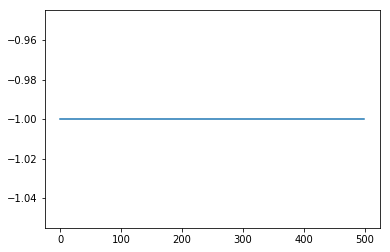

In [4]:
%matplotlib inline

from matplotlib.pyplot import plot

plot(np.array(reward_list));

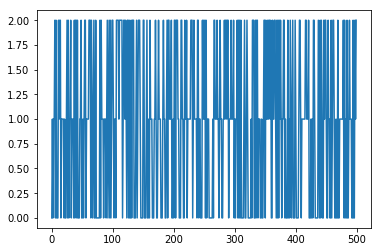

In [5]:
plot(np.array(action_list));

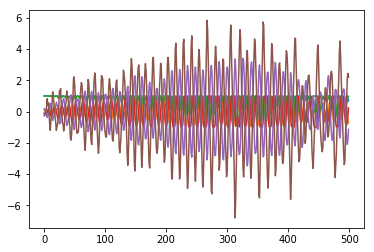

In [6]:
plot(np.array(observation_list));